In [374]:
import numpy as np 
import pandas as pd

In [375]:
import matplotlib.pyplot as pyplot
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [376]:
from collections import Counter
from matplotlib import gridspec

In [377]:
df = pd.read_csv('netflix_titles.csv')

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [379]:
df.head(5) 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [380]:
df.drop(['director', 'cast', 'description'], axis = 1, inplace = True)

In [381]:
df.head(5) 

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas


In [382]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    num_missing = np.sum(df[col].isnull())
    print('{} = {} ({}%)'.format(col, num_missing, round(pct_missing*100)))

show_id = 0 (0%)
type = 0 (0%)
title = 0 (0%)
country = 507 (7%)
date_added = 10 (0%)
release_year = 0 (0%)
rating = 7 (0%)
duration = 0 (0%)
listed_in = 0 (0%)


In [383]:
df['country'].fillna('_MISSING_', inplace = True)
df['date_added'].fillna('_MISSING_', inplace = True)
df['rating'].fillna('_MISSING_', inplace = True)

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    num_missing = np.sum(df[col].isnull())
    print('{} = {} ({}%)'.format(col, num_missing, round(pct_missing*100)))

show_id = 0 (0%)
type = 0 (0%)
title = 0 (0%)
country = 0 (0%)
date_added = 0 (0%)
release_year = 0 (0%)
rating = 0 (0%)
duration = 0 (0%)
listed_in = 0 (0%)


In [384]:
#Drop dates and ratings that are invald, 17 entries total
df.drop(df[df['date_added'] == '_MISSING_'].index, inplace = True)
df.drop(df[df['rating'] == '_MISSING_'].index, inplace = True)

In [385]:
timeFormat = pd.to_datetime(df['date_added'])

year = timeFormat.dt.year
month = timeFormat.dt.month

dmap = {1:'January',2:'February',3:'March',4:'April',4:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}


df.insert(loc=5, column='year_added', value=year)
df.insert(loc=6, column='month_added', value=month.map(dmap))

In [386]:
df.head(3)

,show_id,type,title,country,date_added,year_added,month_added,release_year,rating,duration,listed_in
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,August,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,December,2016,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,Singapore,"December 20, 2018",2018,December,2011,R,78 min,"Horror Movies, International Movies"


In [387]:
df['country'].value_counts()

United States                                                   2546
India                                                            923
_MISSING_                                                        505
United Kingdom                                                   396
Japan                                                            224
                                                                ... 
France, Belgium, China, United States                              1
United States, Canada, Germany                                     1
United Kingdom, Australia                                          1
Canada, India, Thailand, United States, United Arab Emirates       1
United States, France, Canada, Belgium                             1
Name: country, Length: 682, dtype: int64

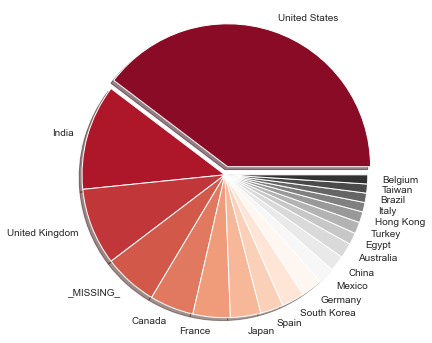

In [396]:
countries = df['country']
countries_count = pd.Series(dict(Counter(','.join(countries).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)

top_20 = countries_count[:20]

explode = [0 for _ in range(20)]
explode[0] = 0.06

fig = pyplot.figure(figsize=(20,6))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10,5])

ax = pyplot.subplot(gs[1])
ax.pie(top_20, labels=top_20.index, shadow=True, startangle=0, explode=explode, autopct='%1.2f%%', colors= sns.color_palette('RdGy', n_colors=20)
)
ax.axis('equal')

pyplot.show()

In [347]:
df.head()

,show_id,type,title,country,date_added,year_added,month_added,release_year,rating,duration,listed_in
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,August,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,December,2016,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,Singapore,"December 20, 2018",2018,December,2011,R,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,United States,"November 16, 2017",2017,November,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,United States,"January 1, 2020",2020,January,2008,PG-13,123 min,Dramas


In [348]:
#Count of both Movies and TV Shows
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

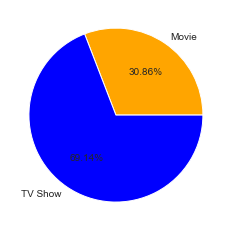

In [349]:
#Count of both Movies and TV Shows

pyplot.pie(df['type'].value_counts().sort_values(), labels=df['type'].value_counts().index, autopct='%1.2f%%', colors=['Orange','Blue'])
pyplot.show()

<AxesSubplot:xlabel='type', ylabel='count'>

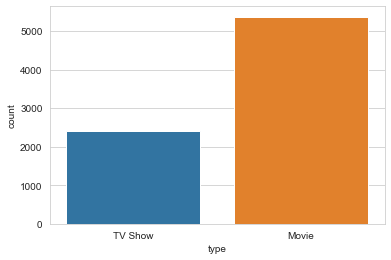

In [350]:
sns.countplot(x='type', data=df)

<AxesSubplot:xlabel='rating', ylabel='count'>

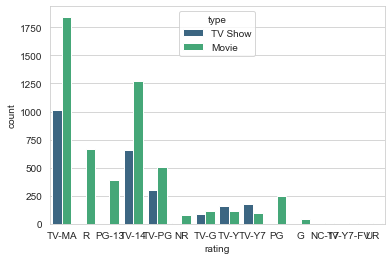

In [351]:
#Count of both Movies and TV Shows - based on ratings
sns.countplot(x='rating', data=df, hue='type', palette='viridis')

<AxesSubplot:xlabel='rating', ylabel='count'>

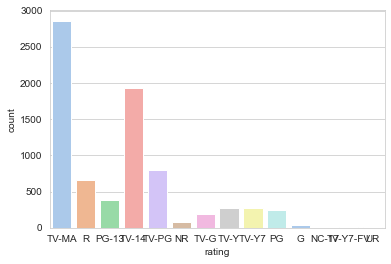

In [352]:
#Count of Ratings

In [353]:
df['rating'].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64